<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/Week3_DeepLearning_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 3 — Deep Learning Basics (Google Colab Notebook)
Hands-on programs with **clear comments** that build from Week 2 (ML).

**What you'll learn this week:**
- Day 11: **Perceptron** on linearly separable data (AND/OR)
- Day 12: **MLP Classifier** (digits classification)
- Day 13: **CNN Basics** (small ConvNet on MNIST subset)
- Day 14: **Regularization** (dropout & early stopping to reduce overfitting)
- Day 15: **RNN/LSTM Basics** (simple sequence prediction)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn (for datasets and simple models)
from sklearn.datasets import load_digits, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TensorFlow / Keras for DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# One chart per figure; no explicit colors set.
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0



## Day 11 — Perceptron (AND/OR)
We implement a minimal **Perceptron** using Keras dense layer with linear activation to learn **AND** / **OR** truth tables.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


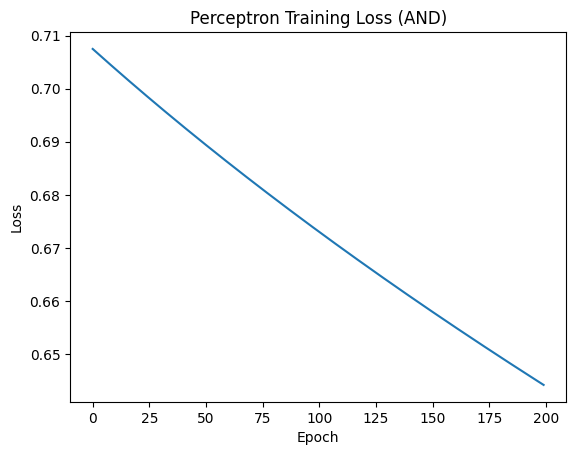

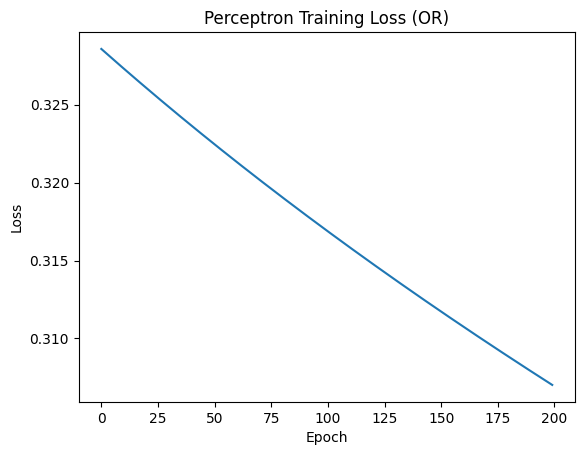

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
AND Predictions: [0, 0, 0, 0]
OR Predictions : [1, 1, 1, 1]


In [ ]:

# --- Day 11: Perceptron on AND/OR ---
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)

# AND target
y_and = np.array([[0],[0],[0],[1]], dtype=np.float32)

model_and = keras.Sequential([layers.Dense(1, input_shape=(2,), activation='sigmoid')])
model_and.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_and = model_and.fit(X, y_and, epochs=200, verbose=0)

# OR target
y_or = np.array([[0],[1],[1],[1]], dtype=np.float32)
model_or = keras.Sequential([layers.Dense(1, input_shape=(2,), activation='sigmoid')])
model_or.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_or = model_or.fit(X, y_or, epochs=200, verbose=0)

# Plot training loss for AND
plt.figure()
plt.plot(hist_and.history['loss'])
plt.title("Perceptron Training Loss (AND)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot training loss for OR
plt.figure()
plt.plot(hist_or.history['loss'])
plt.title("Perceptron Training Loss (OR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

pred_and = (model_and.predict(X) > 0.5).astype(int).reshape(-1)
pred_or = (model_or.predict(X) > 0.5).astype(int).reshape(-1)

print("AND Predictions:", pred_and.tolist())
print("OR Predictions :", pred_or.tolist())



## Day 12 — MLP Classifier (Digits)
We train a **Multi-Layer Perceptron** on the classic **sklearn digits** dataset to classify 8×8 images (10 classes).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


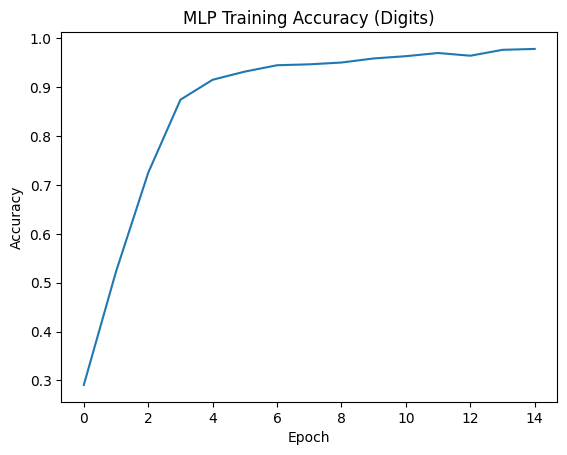

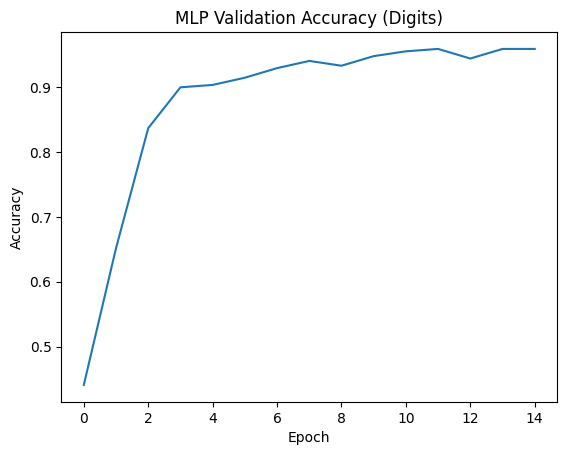

Test Accuracy: 0.973


In [ ]:

# --- Day 12: MLP on Digits ---
digits = load_digits()
X = digits.images  # shape (n, 8, 8)
y = digits.target

# Flatten images
X_flat = X.reshape((X.shape[0], -1)).astype("float32") / 16.0

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.25, random_state=42, stratify=y)

mlp = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(64,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = mlp.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)

# Plot training vs validation accuracy (two separate charts per rules)
plt.figure()
plt.plot(hist.history['accuracy'])
plt.title("MLP Training Accuracy (Digits)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(hist.history['val_accuracy'])
plt.title("MLP Validation Accuracy (Digits)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

test_loss, test_acc = mlp.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc, 3))



## Day 13 — CNN Basics (MNIST Subset)
We train a tiny **ConvNet** on **MNIST** digits (0–9).  
> Note: Colab will download MNIST automatically via Keras.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


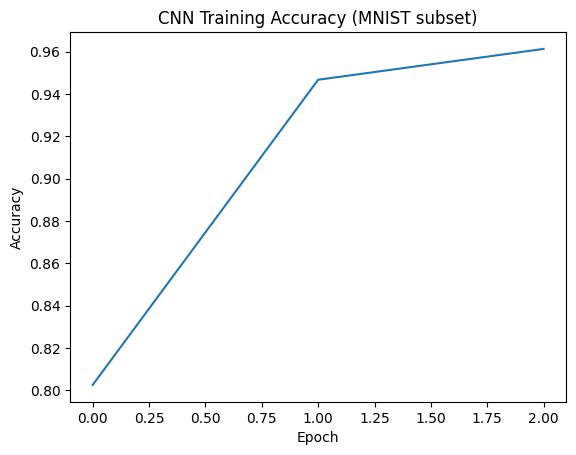

Test Accuracy (subset): 0.96


In [ ]:

# --- Day 13: CNN on MNIST ---
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and add channel dimension
x_train = (x_train.astype("float32") / 255.0)[0:10000]
y_train = y_train[0:10000]
x_test = (x_test.astype("float32") / 255.0)[0:2000]
y_test = y_test[0:2000]
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

cnn = keras.Sequential([
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_cnn = cnn.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1, verbose=0)

# Plot training accuracy (single chart)
plt.figure()
plt.plot(hist_cnn.history['accuracy'])
plt.title("CNN Training Accuracy (MNIST subset)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (subset):", round(test_acc, 3))



## Day 14 — Regularization (Dropout & Early Stopping)
We compare overfitting vs. regularized training on a small MLP using **dropout** and **early stopping**.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


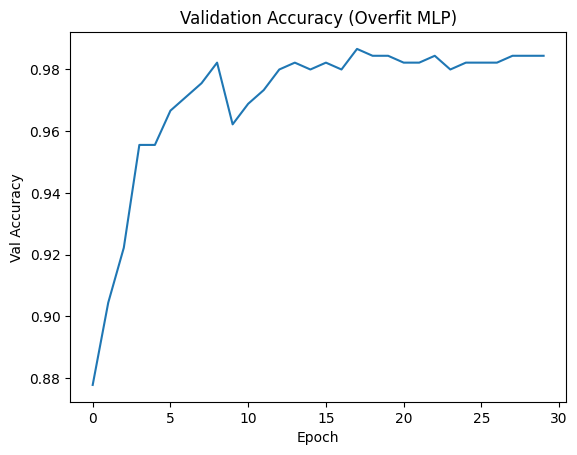

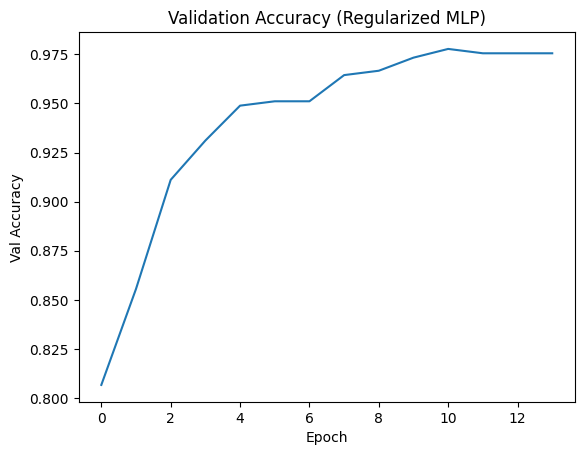

In [ ]:

# --- Day 14: Dropout & Early Stopping ---
X = X_flat  # from digits (Day 12)
y = digits.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

# Overfitting model (no dropout)
overfit_mlp = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(64,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
overfit_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_over = overfit_mlp.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Regularized model (dropout + early stopping)
reg_mlp = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(64,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
reg_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
hist_reg = reg_mlp.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[es], verbose=0)

# Plot overfitting model validation accuracy (single chart)
plt.figure()
plt.plot(hist_over.history['val_accuracy'])
plt.title("Validation Accuracy (Overfit MLP)")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.show()

# Plot regularized model validation accuracy (single chart)
plt.figure()
plt.plot(hist_reg.history['val_accuracy'])
plt.title("Validation Accuracy (Regularized MLP)")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.show()



## Day 15 — RNN/LSTM Basics (Sequence Prediction)
We use a tiny **LSTM** to predict the next value of a noisy **sine wave** sequence.


In [ ]:

# --- Day 15: LSTM on Sine Wave ---
# Generate sine wave
t = np.linspace(0, 50, 2000)
data = np.sin(t) + 0.1*np.random.randn(len(t))

# Prepare sequences
seq_len = 20
X_seq, y_seq = [], []
for i in range(len(data)-seq_len):
    X_seq.append(data[i:i+seq_len])
    y_seq.append(data[i+seq_len])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train/test split
split = int(0.8*len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

lstm = keras.Sequential([
    layers.Input(shape=(seq_len,1)),
    layers.LSTM(32),
    layers.Dense(1)
])
lstm.compile(optimizer='adam', loss='mse')
hist_lstm = lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

# Plot training loss (single chart)
plt.figure()
plt.plot(hist_lstm.history['loss'])
plt.title("LSTM Training Loss (Sine Sequence)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluate on test and plot predicted vs actual (single chart)
pred = lstm.predict(X_test, verbose=0).reshape(-1)
plt.figure()
plt.plot(y_test[:200])
plt.title("LSTM: Actual Next Values (first 200)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()



---
### Practice Exercises
1. **Day 11:** Change optimizer to `adam`—does it converge faster on AND/OR?
2. **Day 12:** Add another Dense layer. Does validation accuracy improve?
3. **Day 13:** Increase epochs to 5 and observe test accuracy change.
4. **Day 14:** Try `Dropout(0.3)`. How does early stopping behave?
5. **Day 15:** Increase `seq_len` to 40. Does the LSTM predict better?

*Generated on:* 2025-10-02 11:14:16
